We'll try ordering vertices in line with a random permutation to hopefully speed up the algorithm. 

In [1]:
using Laplacians
using PyPlot

In [2]:
include("../../src/samplingSolver.jl")

purge (generic function with 1 method)

In [3]:
n = 100000;

In [4]:
a = chimera(n, 1); 

In [5]:
ind = collect(1:n)
sort!(ind, by=x->(deg(a, x)));

degs = Array{Int64,1}(n)
for i in 1:n
    degs[i] = deg(a, ind[i])
end

In [7]:
@time f,gOp,U,d = buildSolver(a, eps = 0.5, sampConst = 0.02);

 27.498428 seconds (5.72 M allocations: 7.425 GB, 40.93% gc time)


In [8]:
@time checkError(gOp)

  7.686025 seconds (23.52 M allocations: 595.847 MB, 7.61% gc time)


1.1038199723981477

Not a great improvement from the baseline. Let's see how Dan's solver performs.

In [9]:
L = lap(a);
@time F = augTreeSolver(L, tol = 1e-1, maxits = 1000, treeAlg = randishPrim);

elapsed time: 0.542884283 seconds
Tree build time:   2.484271 seconds (1.99 M allocations: 378.211 MB, 7.54% gc time)


In [10]:
b = rand(n);
@time F(b);

 13.419719 seconds (419.02 k allocations: 5.985 GB, 5.54% gc time)


In [11]:
@time f(b);

  0.171746 seconds (211.41 k allocations: 7.424 MB)


In [61]:
a = chimera(n, 2)
@time f,gOp,U,d = buildSolver(a, eps = 0.5, sampConst = 0.07);
@time checkError(gOp)

  3.939754 seconds (4.32 M allocations: 2.150 GB, 23.69% gc time)
  4.936834 seconds (34.95 M allocations: 782.028 MB, 9.13% gc time)


0.9946072483571231

In [63]:
0.07 * log(n)^2 / 0.5^2

37.11328677334879

In [8]:
a2 = a[ind, ind];

In [9]:
@time f,gOp,U,d = buildSolver(a2, eps = 0.5, sampConst = 0.02);

 48.598228 seconds (6.75 M allocations: 9.464 GB, 42.10% gc time)


In [10]:
@time checkError(gOp);

 22.989512 seconds (41.94 M allocations: 934.465 MB, 11.56% gc time)


In [11]:
ind = n + 1 - ind;
a2 = a[ind, ind];

In [12]:
@time f,gOp,U,d = buildSolver(a2, eps = 0.5, sampConst = 0.02);

 17.396513 seconds (5.68 M allocations: 5.064 GB, 35.57% gc time)


In [13]:
@time checkError(gOp);

 11.138225 seconds (34.95 M allocations: 782.028 MB, 7.68% gc time)


In [14]:
u = U.data;

In [48]:
degs = []

for i in 1:u.n
    push!(degs, log(nnz(u[:,i]) / i))
end

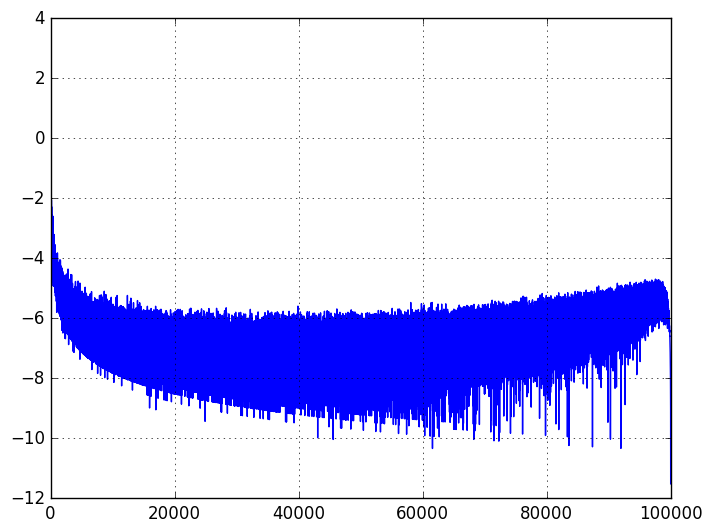

In [49]:
plot(1:n, degs)
grid("on")

In [50]:
mean(degs)

-6.610156739569286